# Versuch 3 - Code 

In [4]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

1. Bestimmung der Tonhöhe eines akustischen Signals 

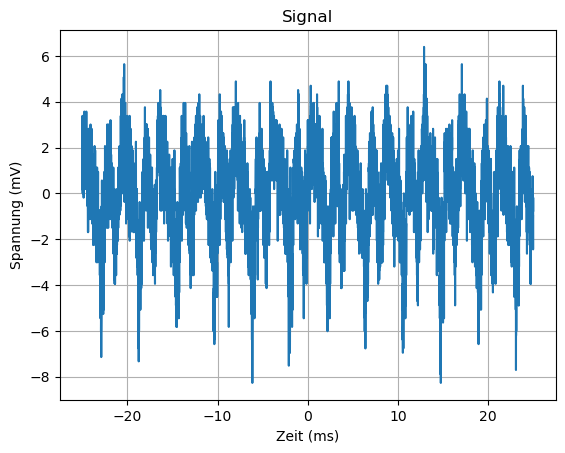

Grundperiode: 0.02209734457522124 ms
Grundfrequenz: 45254.30630797809 Hz
Signaldauer: 0.050014998729999996 s
Abtastfrequenz: 200000.00507847662 Hz
Signallänge: 10004 M
Abtastintervall: 4.999999873038088e-06 s


In [15]:
file_path = "aufgabe1_3.csv"
#csv Datei einlesen
#wichtig: erste Spalte enthält Zeitwerte in ms, zweite Spalte gemessene Spannung in mV 
data = np.genfromtxt(file_path, delimiter=';',skip_header=3, usecols=(0,1), converters={0: lambda s: float(s.decode('utf-8').replace(',', '.')), 1: lambda s: float(s.decode('utf-8').replace(',', '.'))})

zeit_ms = data[:,0]
spannung_mV = data[:,1]

plt.plot(zeit_ms, spannung_mV)
plt.xlabel('Zeit (ms)')
plt.ylabel('Spannung (mV)')
plt.title('Signal')
plt.grid(True)
plt.show()



#Umrechnung der Einheiten für Berechnung (in Sekunden und Volt)
zeit = zeit_ms / 1000
spannung = spannung_mV / 1000 
#Signaldauer (Differenz zwischen letzten und ersten Zeitwert)
signaldauer = zeit[-1] - zeit[0]
#Abtastintervall Mittelwert der Differenzen zwischen aufeinanderfolgenden Zeitwertem
abtastintervall = np.mean(np.diff(zeit))
abtastfrequenz = 1 / abtastintervall
signallaenge  = len(zeit)


#Grundperiode und Grundfrequenz bestimmen 
maxima, _ = find_peaks(spannung, height = 0) #Maxima im Spannug-Array finden 

maxima_abstaende = np.diff(zeit[maxima])
grundperiode = np.mean(maxima_abstaende) * 1000
grundfrequenz =  1 / (grundperiode / 1000)  
  
print(f"Grundperiode: {grundperiode} ms")
print(f"Grundfrequenz: {grundfrequenz} Hz")
print(f"Signaldauer: {signaldauer} s")
print(f"Abtastfrequenz: {abtastfrequenz} Hz")
print(f"Signallänge: {signallaenge} M")
print(f"Abtastintervall: {abtastintervall} s")

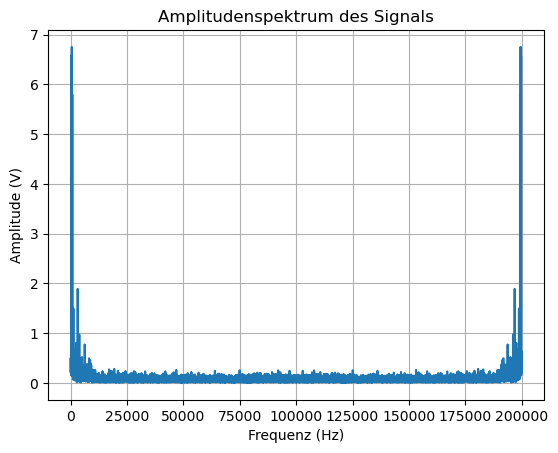

In [25]:
#Fouriertransformierte des Signals berechnen
fourier_transform = np.fft.fft(spannung)
#Amplitudenspektrum berechnen
amplitude = np.abs(fourier_transform)
# Erstellung der Frequenzachse für das Amplitudenspektrum
n = np.arange(signallaenge)
 # Formel f = n/(M·∆t) Frequenzen in Anzahl der Schwingungen pro Signaldauer
frequenzen_hz = n / (signallaenge * abtastintervall)

# Grafische Darstellung des Amplitudenspektrums
plt.plot(frequenzen_hz, amplitude)
plt.xlabel('Frequenz (Hz)')
plt.ylabel('Amplitude (V)')
plt.title('Amplitudenspektrum des Signals')
plt.grid(True)
plt.show()

In [29]:
# Index des Maximum mit der höchsten Amplitude finden
maxima_index = np.argmax(amplitude)
# Grundfrequenz (in Hz) und Amplitude der Maxima bestimmen
grundfrequenz_hz = frequenzen_hz[maxima_index]
grundamplitude = amplitude[maxima_index]

print("Grundfrequenz im Amplitudenspektrum:", grundfrequenz_hz, "Hz")
print("Amplitude:", grundamplitude, "V")

Grundfrequenz im Amplitudenspektrum: 199520.19698952383 Hz
Amplitude: 6.751671292474222 V


2. Frequenzgang von Lautsprechern 

*Anmerkung: alles was als aufgabe3_\* abgespeichert wurde, sind .csv Daten zum kleinen Lautsprecher*